In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy
from collections import Counter


In [32]:
input_path = os.path.join(os.getcwd(), 'data')
subject_path = [os.path.join(input_path, 'Subject_0{}.mat'.format(i)) for i in range(1, 10)] + [os.path.join(input_path, 'Subject_10.mat')]
subject_path

['/workspaces/YJ_661_final_project/data/Subject_01.mat',
 '/workspaces/YJ_661_final_project/data/Subject_02.mat',
 '/workspaces/YJ_661_final_project/data/Subject_03.mat',
 '/workspaces/YJ_661_final_project/data/Subject_04.mat',
 '/workspaces/YJ_661_final_project/data/Subject_05.mat',
 '/workspaces/YJ_661_final_project/data/Subject_06.mat',
 '/workspaces/YJ_661_final_project/data/Subject_07.mat',
 '/workspaces/YJ_661_final_project/data/Subject_08.mat',
 '/workspaces/YJ_661_final_project/data/Subject_09.mat',
 '/workspaces/YJ_661_final_project/data/Subject_10.mat']

In [33]:
mat = scipy.io.loadmat(subject_path[0])
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'images', 'automaticFluidDME', 'manualFluid1', 'manualFluid2', 'automaticLayersDME', 'automaticLayersNormal', 'manualLayers1', 'manualLayers2'])

Size of image is (61, 496, 768) Resolution of image is 496 x 768
Size of manual fluid is (61, 496, 768) Resolution of manual fluid is 496 x 768


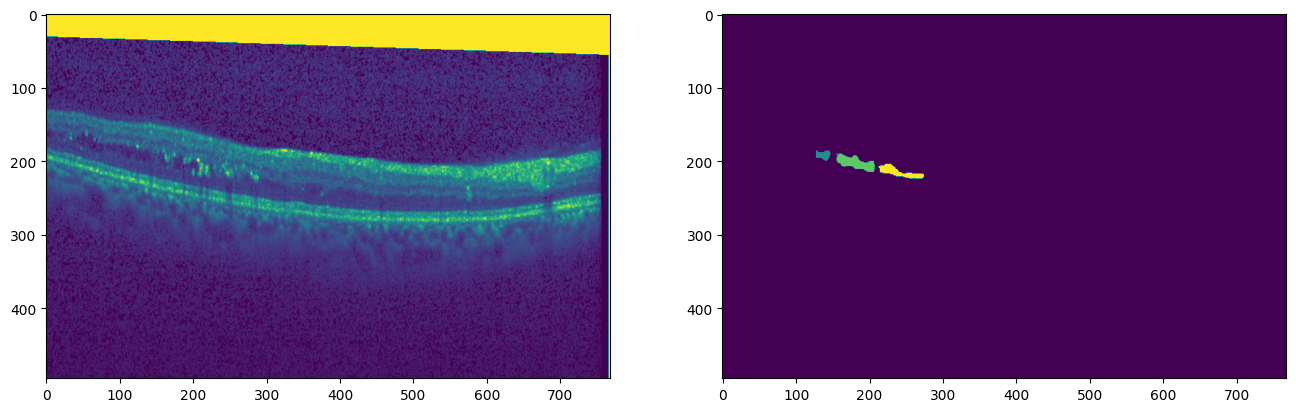

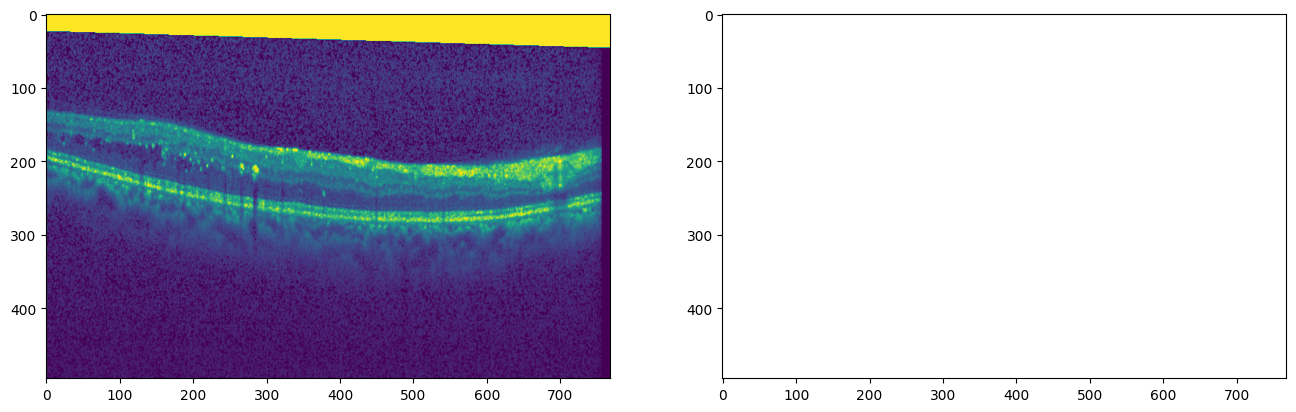

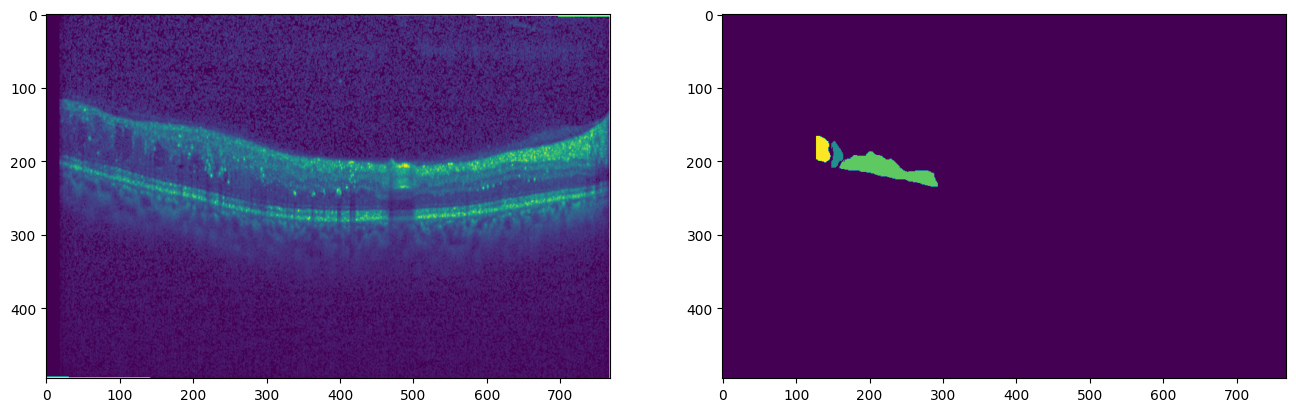

In [51]:
img_tensor = mat['images']
manual_fluid_tensor_1 = mat['manualFluid1']

img_array = np.transpose(img_tensor, (2, 0, 1))
manual_fluid_array = np.transpose(manual_fluid_tensor_1, (2, 0, 1))

print(f"Size of image is {img_array.shape}", f", Resolution of image is {img_array.shape[1]} x {img_array.shape[2]}")
print(f"Size of manual fluid is {manual_fluid_array.shape}", f", Resolution of manual fluid is {manual_fluid_array.shape[1]} x {manual_fluid_array.shape[2]}")

# visualize img_array and manual_fluid_array
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(img_array[20])
ax[1].imshow(manual_fluid_array[20])

# visualize img_array and manual_fluid_array
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(img_array[21])
ax[1].imshow(manual_fluid_array[21])

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(img_array[45])
ax[1].imshow(manual_fluid_array[45])

In [52]:
num_img = 0
path_idx_list = []
for path in subject_path:
    mat = scipy.io.loadmat(path)
    img_tensor = mat['images']
    manual_fluid_tensor_1 = mat['manualFluid1']

    img_array = np.transpose(img_tensor, (2, 0, 1))
    manual_fluid_array = np.transpose(manual_fluid_tensor_1, (2, 0, 1))

    num_img += img_array.shape[0]

    for i in range(manual_fluid_array.shape[0]):
        if np.isnan(manual_fluid_array[i]).all():
            continue
        else:
            path_idx_list.append((path, i))
            print(i, Counter(manual_fluid_array[i].flatten()))

10 Counter({0.0: 380390, 3.0: 214, 1.0: 209, 2.0: 115})
15 Counter({0.0: 378444, 1.0: 1384, 3.0: 851, 2.0: 249})
20 Counter({0.0: 376822, 11.0: 1794, 10.0: 555, 12.0: 418, 13.0: 377, 9.0: 313, 1.0: 207, 7.0: 103, 5.0: 100, 8.0: 77, 6.0: 66, 4.0: 50, 3.0: 45, 2.0: 1})
25 Counter({0.0: 370409, 1.0: 8891, 2.0: 611, 6.0: 230, 3.0: 119, 5.0: 113, 4.0: 99, 11.0: 94, 10.0: 90, 9.0: 71, 8.0: 65, 12.0: 47, 7.0: 47, 13.0: 42})
28 Counter({0.0: 366210, 5.0: 4442, 1.0: 3754, 6.0: 3175, 2.0: 3082, 4.0: 211, 3.0: 54})
30 Counter({0.0: 359277, 3.0: 7483, 1.0: 7018, 2.0: 6621, 5.0: 439, 4.0: 90})
32 Counter({0.0: 363383, 2.0: 5927, 6.0: 5840, 1.0: 3793, 5.0: 1761, 3.0: 144, 4.0: 80})
35 Counter({0.0: 373277, 5.0: 4853, 2.0: 1225, 4.0: 492, 1.0: 434, 6.0: 245, 3.0: 199, 8.0: 123, 7.0: 80})
40 Counter({0.0: 380674, 1.0: 139, 2.0: 115})
45 Counter({0.0: 380928})
50 Counter({0.0: 380928})
10 Counter({0.0: 380928})
15 Counter({0.0: 380928})
20 Counter({0.0: 380928})
25 Counter({0.0: 378981, 2.0: 989, 3.0: 

In [53]:
print(f"There are {num_img} images in the dataset.")
print(f"There are {len(path_idx_list)} images with fluid in the dataset.")

There are 610 images in the dataset.
There are 110 images with fluid in the dataset.


In [54]:
from mmseg.apis import MMSegInferencer
# Load models into memory
inferencer = MMSegInferencer(model='deeplabv3plus_r18-d8_4xb2-80k_cityscapes-512x1024')
# Inference
inferencer('demo/demo.png', show=True)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3plus/deeplabv3plus_r18-d8_512x1024_80k_cityscapes/deeplabv3plus_r18-d8_512x1024_80k_cityscapes_20201226_080942-cff257fe.pth


Downloading: "https://download.openmmlab.com/mmsegmentation/v0.5/deeplabv3plus/deeplabv3plus_r18-d8_512x1024_80k_cityscapes/deeplabv3plus_r18-d8_512x1024_80k_cityscapes_20201226_080942-cff257fe.pth" to /home/codespace/.cache/torch/hub/checkpoints/deeplabv3plus_r18-d8_512x1024_80k_cityscapes_20201226_080942-cff257fe.pth
/opt/conda/envs/openmmlab/lib/python3.10/site-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/opt/conda/envs/openmmlab/lib/python3.10/site-packages/mmseg/models/losses/cross_entropy_loss.py:249: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


11/26 21:05:19 - mmengine - WARNING - Failed to search registry with scope "mmseg" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmseg" is a correct scope, or whether the registry is initialized.


/opt/conda/envs/openmmlab/lib/python3.10/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

/opt/conda/envs/openmmlab/lib/python3.10/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


{'predictions': array([[ 2,  2,  2, ...,  2,  2,  2],
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [ 0,  0,  0, ...,  2,  2,  2],
        [ 0,  0,  0, ...,  2,  2,  2],
        [ 0,  0,  0, ..., 13,  2,  2]]),
 'visualization': []}

In [56]:
from mmseg.apis import MMSegInferencer
# models is a list of model names, and them will print automatically
models = MMSegInferencer.list_models('mmseg')

11/26 21:08:41 - mmengine - INFO - model_name: ann_r50-d8_4xb2-40k_cityscapes-512x1024
model_name: ann_r101-d8_4xb2-40k_cityscapes-512x1024
model_name: ann_r50-d8_4xb2-40k_cityscapes-769x769
model_name: ann_r101-d8_4xb2-40k_cityscapes-769x769
model_name: ann_r50-d8_4xb2-80k_cityscapes-512x1024
model_name: ann_r101-d8_4xb2-80k_cityscapes-512x1024
model_name: ann_r50-d8_4xb2-80k_cityscapes-769x769
model_name: ann_r101-d8_4xb2-80k_cityscapes-769x769
model_name: ann_r50-d8_4xb4-80k_ade20k-512x512
model_name: ann_r101-d8_4xb4-80k_ade20k-512x512
model_name: ann_r50-d8_4xb4-160k_ade20k-512x512
model_name: ann_r101-d8_4xb4-160k_ade20k-512x512
model_name: ann_r50-d8_4xb4-20k_voc12aug-512x512
model_name: ann_r101-d8_4xb4-20k_voc12aug-512x512
model_name: ann_r50-d8_4xb4-40k_voc12aug-512x512
model_name: ann_r101-d8_4xb4-40k_voc12aug-512x512
model_name: apcnet_r50-d8_4xb2-40k_cityscapes-512x1024
model_name: apcnet_r101-d8_4xb2-40k_cityscapes-512x1024
model_name: apcnet_r50-d8_4xb2-40k_cityscapes-76